# 데이터 살펴보기

100%|██████████| 170498071/170498071 [00:13<00:00, 12741052.82it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


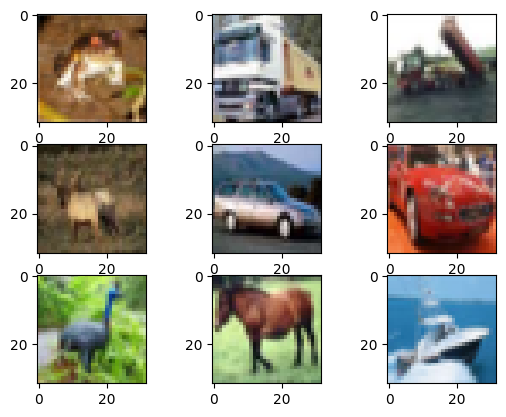

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

# 1. CIFAR10 데이터셋을 불러옴
# root는 CIFAR-10 이미지를 내려받는 경로를 말합니다.
# 이번에는 현재 디렉터리를 나타내는 "./"를 사용합니다.
# transform은 데이터 전처리를 의미합니다.
# ToTensor()를 이용해 이미지를 파이토치 텐서로 변환해줍니다.
training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor())

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=ToTensor())

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(training_data.data[i])
plt.show()

# 데이터 전처리에 크롭핑과 뒤집기를 추가

Files already downloaded and verified
Files already downloaded and verified


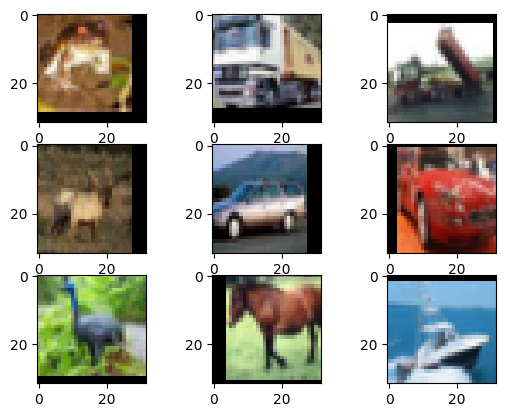

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([ # 1. 데이터 전처리 함수들
   T.ToPILImage(),
   RandomCrop((32, 32), padding=4), # 2. 랜덤으로 이미지 일부 제거 후 패딩
   RandomHorizontalFlip(p=0.5),     # 3. y축으로 기준으로 대칭
])

# 데이터 전처리를 정의합니다. Compose 객체 안에 차례대로 넣어주면 순서대로 이미지에 적용
# Compose([*tf]) 설명 : 전처리 함수 tf를 입력받아 차례대로 실행
# RandomCrop()은 이미지 안의 임의의 부분을 잘라냅니다. (32,32)는 최종 출력 크기를 말합니다.
# padding 은 모자란 부분을 0으로 채워준다는 의미
# RandomCrop(size) 설명 : 이미지의 일부를 제거한 뒤 size 크기로 복원합니다.
# RandomHorizontalFlip()은 이미지를 y축 대칭으로 대칭합니다.
# p는 이미지가 대칭될 확률을 의미합니다.


training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms) # transform에는 데이터를 변환하는 함수가 들어감

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms)

for i in range(9):
   plt.subplot(3, 3, i+1)
   plt.imshow(transforms(training_data.data[i]))
plt.show()

# 데이터 전처리에 정규화를 추가
- 데이터의 분포가 너무 치우쳐져 있으면 학습에 안 좋은 영향을 끼칠 수 있음

Files already downloaded and verified
Files already downloaded and verified


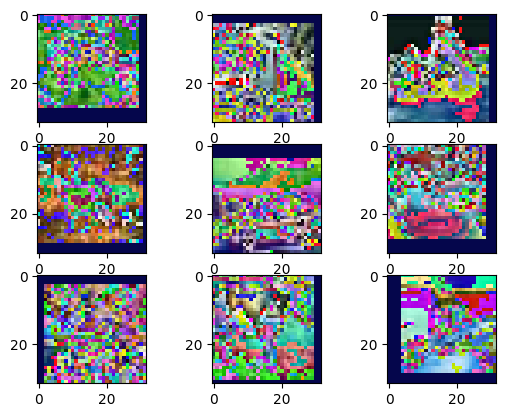

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

transforms = Compose([
   T.ToPILImage(),
   RandomCrop((32, 32), padding=4),
   RandomHorizontalFlip(p=0.5),
   T.ToTensor(),
   # 1. 데이터 정규화
   Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
   T.ToPILImage()
])

# mean은 평균을, std는 표준편차를 나타냅니다.
# 괄호안의 값은 차례대로 R, G, B를 의미합니다.

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms)
test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms)

for i in range(9):
   plt.subplot(3, 3, i+1)
   plt.imshow(transforms(training_data.data[i]))
plt.show()

# 데이터셋의 평균과 표준편차

In [4]:
import torch

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor())

# item[0]은 이미지, item[1]은 정답 레이블
imgs = [item[0] for item in training_data]
# imgs는 이미지를 여러 개 담고 있는 리스트
# 파이토치에서 사용하기 위해 리스트를 텐서로 변형

# 1. imgs를 하나로 합침
imgs = torch.stack(imgs, dim=0).numpy()
# stack(tensor, dim)
# tensor를 dim 방향으로 합쳐줍니다.
# 예를 들어 (224, 224) 크기의 텐서를 dim=0 방향으로 텐서 세개를 합치면 3, 224, 224 모양의 텐서가 됩니다.
# 텐서는 요소의 모양을 중요하게 생각함(모든 요소의 모양이 동일해야함)

# rgb 각각의 평균
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print(mean_r,mean_g,mean_b)

# rgb 각각의 표준편차
std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(std_r,std_g,std_b)

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


# VGG 기본 블록 정의

- 합성곱 3x3은 커널 크기가 3행 3열인 합성곱 연산을 의미합니다.
- 최대 풀링은 이미지 크기를 절반으로 줄이는 연산으로 합성곱을 통해 얻은 특징의 위치 정보를 의도적으로 없애 오버피팅을 피하는 기법입니다.
- 커널을 이동하면서 커널 안의 값을 최댓값만을 남기는 것으로, 중요한 특징의 값을 알 수 있습니다.

In [5]:
import torch
import torch.nn as nn


# 모듈의 __init__() 함수는 모듈의 초기화를 담당합니다.
# __init__() 안에 모든 층을 정의 해야 합니다.
# super()는 상속받은 부모 클래스의 요소를 사용하는 함수입니다.

class BasicBlock(nn.Module): # ❶ 기본 블록을 정의합니다.
   # 기본블록을 구성하는 계층의 정의
   def __init__(self, in_channels, out_channels, hidden_dim):
       # ❷ nn.Module 클래스의 요소 상속
       super(BasicBlock, self).__init__()

      # 3. 합성곱층 정의
      # in_channels 에는 입력의 채널 수를,
      # out_channels는 출력의 채널 수를 의미합니다.
      # padding은 이미지 외곽에 추가할 0 개수를 의미합니다.
       self.conv1 = nn.Conv2d(in_channels, hidden_dim,
                              kernel_size=3, padding=1)
       self.conv2 = nn.Conv2d(hidden_dim, out_channels,
                              kernel_size=3, padding=1)
       self.relu = nn.ReLU()

      # stride는 커널의 이동 거리를 의미합니다.
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

      # MaxPool2d(kernel, stride)
      # 최대 풀링을 실행합니다. kernel은 커널 크기, stride는 커널이 이동하는 거리를 지정합니다.
      # Conv2d(in, out, kernel, stride)
      # 합성곱을 계산합니다. in은 입력 채널 개수, out은 출력 채널 개수, kernel은 커널 크기, stride는 스트라이드를 정의합니다.


   def forward(self, x): # ➍  기본블록의 순전파 정의
       x = self.conv1(x)
       x = self.relu(x)
       x = self.conv2(x)
       x = self.relu(x)
       x = self.pool(x)

       return x

# VGG 모델 정의하기

In [6]:
class CNN(nn.Module):
   def __init__(self, num_classes): # num_classes는 클래스의 개수를 의미합니다
       super(CNN, self).__init__()

       # 1. 합성곱 기본 블록의 정의
       self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16)
       self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64)
       self.block3 = BasicBlock(in_channels=128, out_channels=256,
                                hidden_dim=128)


       # 2. 분류기 정의
       # 반드시 합성곱 블록과 개수를 맞출 필요는 없지만 일반적으로 분류기층 MLP층 3개로 구성합니다.
       self.fc1 = nn.Linear(in_features=4096, out_features=2048)
       self.fc2 = nn.Linear(in_features=2048, out_features=256)
       self.fc3 = nn.Linear(in_features=256, out_features=num_classes)


       # 3. 분류기의 활성화 함수
       self.relu = nn.ReLU()


   def forward(self, x):
       x = self.block1(x)
       x = self.block2(x)
       x = self.block3(x)  # 출력 모양: (-1, 256, 4, 4)
       # 4. 2차원 특징맵을 1차원으로 변형
        # start_dim은 풀어주기 시작하는 차원을 의미합니다.
        # 주어지지 않을 경우 배치 크기 까지 전부 풀어버리므로 4x4의 256채널 이미지만을 풀어주기 위해서 1을 넣음
       x = torch.flatten(x, start_dim=1)

       x = self.fc1(x)
       x = self.relu(x)
       x = self.fc2(x)
       x = self.relu(x)
       x = self.fc3(x)

       return x

# 데이터 증강 정의

In [7]:
from torch.utils.data.dataloader import DataLoader

from torch.optim.adam import Adam

transforms = Compose([
   RandomCrop((32, 32), padding=4),  # ❶ 랜덤 크롭핑
   RandomHorizontalFlip(p=0.5),  # ❷ y축으로 뒤집기
   ToTensor(),  # ❸ 텐서로 변환
   # ❹ 이미지 정규화
   Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
])

# 데이터 로드 및 모델 정의

In [8]:
# 1. 학습 데이터와 평가 데이터 불러오기
training_data = CIFAR10(root="./", train=True, download=True, transform=transforms)
test_data = CIFAR10(root="./", train=False, download=True, transform=transforms)


# 2. 데이터로더 정의
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


# 3. 학습을 진행할 프로세서 설정
device = "cuda" if torch.cuda.is_available() else "cpu"


# 4. CNN 모델 정의
model = CNN(num_classes=10)

# 5. 모델을 device로 보냄
model.to(device)

Files already downloaded and verified
Files already downloaded and verified


CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

# 모델 학습하기

In [9]:
# 1. 학습률 정의
lr = 1e-3

# 2. 최적화 기법 정의
optim = Adam(model.parameters(), lr=lr)

# 학습 루프 정의
for epoch in range(100):
   for data, label in train_loader:  # 3. 데이터 호출
       optim.zero_grad()  # 4. 기울기 초기화

       preds = model(data.to(device))  # 5. 모델의 예측

       # 6. 오차역전파와 최적화
       loss = nn.CrossEntropyLoss()(preds, label.to(device))
       loss.backward()
       optim.step()

   if epoch==0 or epoch%10==9:  # 10번마다 손실 출력
       print(f"epoch{epoch+1} loss:{loss.item()}")

# 모델 저장
torch.save(model.state_dict(), "CIFAR.pth")

epoch1 loss:1.5162755250930786
epoch10 loss:0.4684380292892456
epoch20 loss:0.3699345290660858
epoch30 loss:0.7063988447189331
epoch40 loss:0.5705750584602356
epoch50 loss:0.13157209753990173
epoch60 loss:0.5597445964813232
epoch70 loss:0.8326025009155273
epoch80 loss:0.034240029752254486
epoch90 loss:0.5636698007583618
epoch100 loss:0.09221228212118149


In [10]:
model.load_state_dict(torch.load("CIFAR.pth", map_location=device))

num_corr = 0

with torch.no_grad():
   for data, label in test_loader:

       output = model(data.to(device))
       preds = output.data.max(1)[1]
       corr = preds.eq(label.to(device).data).sum().item()
       num_corr += corr

   print(f"Accuracy:{num_corr/len(test_data)}")

Accuracy:0.8403
